## NONLINEAR REGRESSION

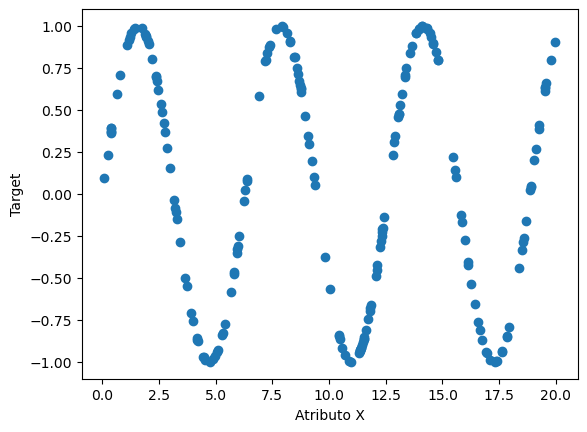

In [4]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV # El método GridSearchCV realiza la validación cruzada automáticamente

# Generación de datos aleatorios
np.random.seed(0)
X = np.sort(20 * np.random.rand(200,1), axis=0)
y = np.sin(X)[:, 0]
y_ruido = np.sin(X)[:, 0] + np.random.normal(size=X.shape[0],scale=0.20)
plt.xlabel("Atributo X")
plt.ylabel("Target")
plt.scatter(X, y.ravel())
plt.show()

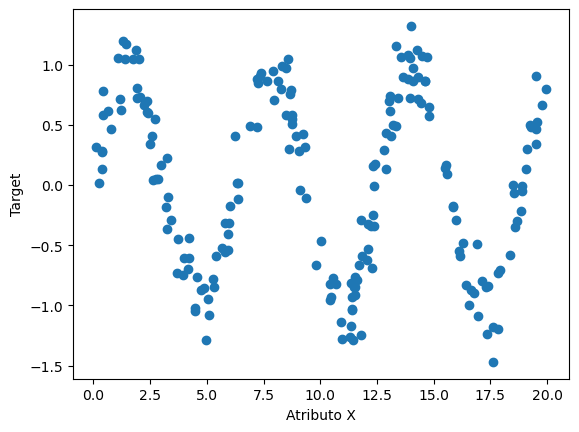

In [5]:
# Se añade ruido para hacer los datos con una forma más realista
plt.xlabel("Atributo X")
plt.ylabel("Target")
plt.scatter(X, y_ruido.ravel())
plt.show()

El mejor estimador es: KNeighborsRegressor(n_neighbors=2)


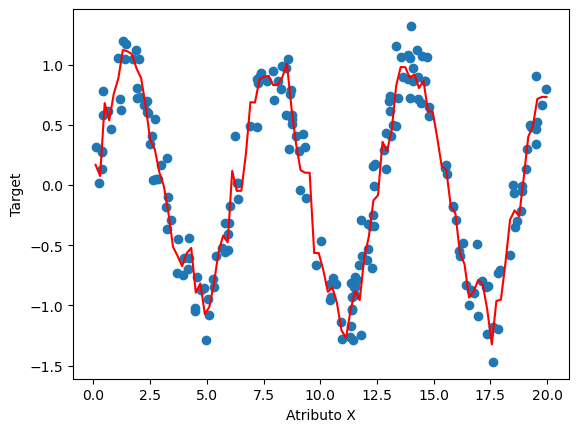

In [5]:
# Se ajusta el modelo KNN optimizando el parámetro n_neighbors (k)
# por medio de validación cruzada y se representan las predicciones 
clf = KNeighborsRegressor()
params = {"n_neighbors": range(1, 20)}
clf_gs = GridSearchCV(clf, params, cv=3)
clf_gs.fit(X, y_ruido)
print('El mejor estimador es: {}'.format(clf_gs.best_estimator_))
X_axis = np.linspace(X.min(),X.max(), 100).reshape(100, 1)
y_axis_pred = clf_gs.best_estimator_.predict(X_axis)
plt.xlabel("Atributo X")
plt.ylabel("Target")
plt.scatter(X, y_ruido.ravel())
plt.plot(X_axis, y_axis_pred, c="red")
plt.show()